# README: Bayes and Naive Bayes

## 1. What is Bayes' Theorem?

Bayes' Theorem is a mathematical formula used to calculate the conditional probability of an event based on prior knowledge of conditions related to the event. It helps to update the probability of a hypothesis as more evidence becomes available.

The formula for Bayes' Theorem is:

$$
P(C|X) = \frac{P(X|C) \cdot P(C)}{P(X)}
$$

Where:

- **\(P(C|X)\):** Posterior probability (probability of class \(C\) given evidence \(X\)).
- **\(P(X|C)\):** Likelihood (probability of observing \(X\) given class \(C\)).
- **\(P(C)\):** Prior probability of class \(C\) (how frequent class \(C\) is in general).
- **\(P(X)\):** Evidence (probability of the observed data \(X\)).



## 2. What is Naive Bayes?

Naive Bayes is a classification algorithm based on Bayes' Theorem. It is called "naive" because it assumes that all features are independent of each other given the class label. Despite this simplification, Naive Bayes performs well in many practical applications.

### Key Features of Naive Bayes:

- Simple and efficient for both small and large datasets.
- Works well with categorical and text data.
- Commonly used in spam detection, sentiment analysis, and document classification.

---

## 3. How Does Naive Bayes Work?

### Step 1: Training Phase

1. **Calculate Prior Probabilities \(P(C)\):**
   - Compute the overall probability of each class based on the training data (e.g., how many emails are spam vs. not spam).

2. **Calculate Likelihoods \(P(X|C)\):**
   - For each feature (e.g., words in an email), compute how often it appears for each class. This is the likelihood \(P(x_i|C)\), where \(x_i\) is a feature.

3. **Store Probabilities:**
   - Store the prior and likelihood probabilities for use during prediction.



### Step 2: Prediction Phase

1. **Compute Posterior Probability for Each Class:**
   - For a new instance with feature set \(X = \{x_1, x_2, ..., x_n\}\), calculate the posterior probability for each class \(C\):

     $$
     P(C|X) \propto P(X|C) \cdot P(C)
     $$

   - Using the independence assumption:

     $$
     P(X|C) = P(x_1|C) \cdot P(x_2|C) \cdot ... \cdot P(x_n|C)
     $$

2. **Choose the Class with the Highest Probability:**
   - Compare the posterior probabilities for all classes.
   - Assign the class with the highest probability as the prediction.



## 4. Example Workflow

Let’s classify an email as Spam or Not Spam:

1. **Training data:**
   - Words like "win", "money", and "offer" appear more frequently in spam emails.
   - Words like "meeting" or "schedule" appear more frequently in non-spam emails.

2. **Probabilities:**
   - Calculate \(P(\text{Spam})\) and \(P(\text{Not Spam})\).
   - Calculate likelihoods for each word, e.g., \(P(\text{win}|\text{Spam})\), \(P(\text{money}|\text{Not Spam})\), etc.

3. **For a new email:**
   - Combine probabilities for all words in the email for both classes.
   - Choose the class with the highest posterior probability.



## 5. Advantages

- Simple, fast, and effective.
- Works well even with limited data.
- Handles irrelevant features gracefully.



## 6. Limitations

- Assumes feature independence, which might not hold in real-world data.
- Struggles with datasets where features have strong correlations.


In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
iris=load_iris()
x=iris.data
y=iris.target

df=pd.DataFrame(data=x, columns=iris.feature_names)
df['target']=y
print(df.head())

#how features are distributed to classes
print("Class Distribution:")
print(df['target'].value_counts())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  target
0                5.1               3.5                1.4               0.2       0
1                4.9               3.0                1.4               0.2       0
2                4.7               3.2                1.3               0.2       0
3                4.6               3.1                1.5               0.2       0
4                5.0               3.6                1.4               0.2       0
Class Distribution:
target
0    50
1    50
2    50
Name: count, dtype: int64


In [9]:
#split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.70, random_state=42)

In [10]:
#shapes to verify the training and testing data
print(f"Training Data Shape: {x_train.shape}")
print(f"Testing Data Shape: {x_test.shape}")

Training Data Shape: (45, 4)
Testing Data Shape: (105, 4)


In [11]:
#train uisng Gaussian Naive Bayes classifier
gnb= GaussianNB()
gnb.fit(x_train,y_train)


y_pred= gnb.predict(x_test)

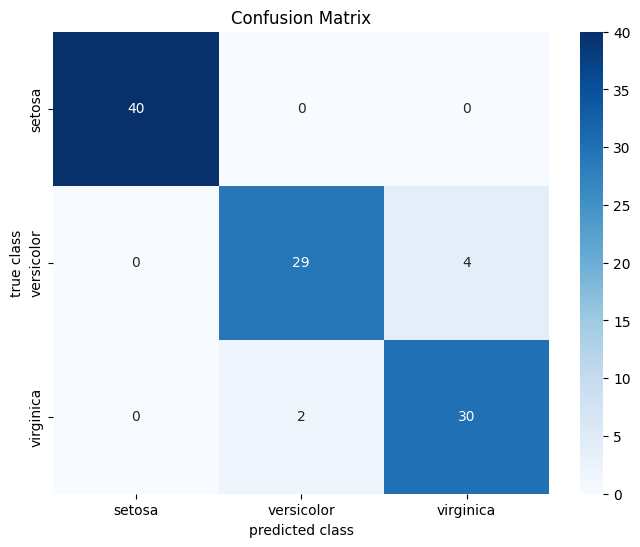

In [14]:
#Generate a confusion matrix
cm= confusion_matrix(y_test, y_pred)

#plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('predicted class')
plt.ylabel('true class')
plt.show()

In [15]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.94      0.88      0.91        33
   virginica       0.88      0.94      0.91        32

    accuracy                           0.94       105
   macro avg       0.94      0.94      0.94       105
weighted avg       0.94      0.94      0.94       105

Accuracy: 0.94


# Conclusion

Based on the metrics and visualizations:

  Confusion Matrix: Displays how many instances were correctly or incorrectly classified.

  Classification Report: Provides precision, recall, F1-score, and support for each class.

  Accuracy: Quantifies overall performance.

  Decision Boundaries: Visualizes how the model separates the classes.

Example Results:

  Accuracy: ~94% (may vary due to random state).

  Strengths: Simple and efficient, especially on small datasets like Iris.
  
  Limitations: Assumes feature independence, which may not always hold true.



# 1. Gaussian Naive Bayes

## Assumption:
- Features are **continuous** and follow a **Gaussian (normal) distribution**.
- If features deviate significantly from a Gaussian distribution, this might not work well unless preprocessing techniques (like transformations) are applied.

## Formula:
The likelihood \( P(x \mid C) \) is calculated using the probability density function (PDF) of a Gaussian distribution:
$$
P(x \mid C) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$

Where:
- \( \mu \): Mean of the feature in class \( C \)
- \( \sigma^2 \): Variance of the feature in class \( C \)

## When to Use:
- Works well for **continuous numerical features**.
- **Example**: Iris dataset (where petal length/width are continuous variables).

## Applications:
- Predicting whether a tumor is **malignant or benign** (based on continuous data like size or age).
- **Medical diagnosis** problems involving continuous patient attributes.

---

# 2. Multinomial Naive Bayes

## Assumption:
- Features represent **discrete counts** (e.g., word frequencies, term counts, or categorical data).
- Used mainly for **text classification tasks**.

## Formula:
For each feature \( x \) in class \( C \):
$$
P(x \mid C) = \frac{n_{x \mid C} + \alpha}{n_C + \alpha d}
$$

Where:
- \( n_{x \mid C} \): Count of feature \( x \) in class \( C \)
- \( n_C \): Total count of all features in class \( C \)
- \( \alpha \): Smoothing parameter (Laplace smoothing)
- \( d \): Total number of features

## When to Use:
- Suitable for **discrete** features (e.g., word counts in documents or frequency data).
- **Example**: Spam detection, sentiment analysis.

## Applications:
- **Text classification** (e.g., classifying emails as spam or non-spam).
- **Natural Language Processing (NLP)** tasks like topic modeling.

---

# 3. Bernoulli Naive Bayes

## Assumption:
- Features are **binary** (0 or 1).
- Indicates whether a feature is **present (1)** or **absent (0)**.

## Formula:
For each feature \( x \) in class \( C \):
$$
P(x \mid C) = p^x \cdot (1 - p)^{1 - x}
$$

Where:
- \( p \): Probability of feature \( x \) being 1 in class \( C \)

## When to Use:
- Works well with **binary data** or data that can be binarized.
- **Example**: A document can be represented as a binary vector where 1 indicates a word's presence and 0 indicates its absence.

## Applications:
- **Sentiment analysis** (presence/absence of positive or negative words).
- **Spam detection** (presence/absence of specific spam keywords).
- **Recommendation systems** (whether a user has interacted with an item or not).

---

# Choosing the Right Naive Bayes Variant

| **Type**               | **Feature Type**               | **Example Applications**                     |
|------------------------|---------------------------------|-----------------------------------------------|
| Gaussian Naive Bayes    | Continuous numerical features  | Medical diagnosis, real-valued datasets       |
| Multinomial Naive Bayes | Discrete count features        | Spam detection, document classification       |
| Bernoulli Naive Bayes   | Binary features (0/1)          | Sentiment analysis, recommendation systems    |

---

# Example Scenarios

## Gaussian Naive Bayes:
- **Predicting loan approval** based on income, age, and loan amount (all continuous).

## Multinomial Naive Bayes:
- **Classifying news articles** into categories (e.g., sports, politics) using word frequency data.

## Bernoulli Naive Bayes:
- **Sentiment analysis** where the feature vector indicates the presence/absence of specific words.
